# Work with PyTorch Datasets
---

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt

## Creatin custom dataset
To create your own dataset - class providing training/testing examples, you need to inherit from abstract class `torch.utils.data.Dataset` and override those methods:
 - `__len__` so that len(dataset) returns the size of the dataset.
 - `__getitem__` to support the indexing such that dataset[i] can be used to get ith sample

In [2]:
import numpy as np
import torch
from torch.utils.data import Dataset

In [7]:
class RandomVectorDataset(Dataset):
    """Random vector dataset."""
    
    def __init__(self, random_shape, transform=None):
        """
        Args:
            random_shape (list): Shape of random data in dataset
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.raw_data = np.random.randn(*random_shape)
        self.transform = transform
        
    def __len__(self):
        return self.raw_data.shape[0]
    
    def __getitem__(self, idx):
        sample = {'random_vector': self.raw_data[idx]}
        if self.transform:
            sample = self.transform(sample)
        return sample

In [8]:
random_vector_dataset = RandomVectorDataset(random_shape=[10, 5])

In [9]:
len(random_vector_dataset)

10

In [10]:
random_vector_dataset[5]

{'random_vector': array([ 0.58856919,  0.35469887, -0.72345715, -0.06882607,  0.45695756])}

## Apply transformations to data
We can create objects with `__call__` method applying transforamtions to data from dataset. To put more transformations together, we can use `torchvision.transforms.Compose`.

In [3]:
from torchvision.transforms import Compose

In [14]:
class Add2(object):
    def __call__(self, sample):
        return {'random_vector': sample['random_vector']+2}

class ToTorchTensor(object):
    def __call__(self, sample):
        return {'random_vector': torch.from_numpy(sample['random_vector'])}

In [17]:
transformations = Compose([Add2(), ToTorchTensor()])

In [18]:
random_vector_dataset = RandomVectorDataset(random_shape=[10, 5], transform=transformations)
random_vector_dataset[5]

{'random_vector': tensor([2.7755, 1.7905, 3.3448, 0.9494, 3.0509], dtype=torch.float64)}

## Sampling batches from dataset
PyTorch provides iterator `torch.utils.data.DataLoader` for work with datasets based on `torch.utils.data.Dataset`.   
It enables
 - batching the data
 - shuffling the data  
 - load the data in parallel using multiprocessing workers


In [11]:
from torch.utils.data import DataLoader

In [12]:
data_loader = DataLoader(random_vector_dataset, batch_size=10, num_workers=1, shuffle=True)

In [13]:
next(iter(data_loader))

{'random_vector': tensor([[ 1.8035,  0.0787, -0.4974, -0.7880,  1.6502],
         [ 0.1445,  0.6237, -2.2757,  0.3389,  0.5110],
         [-0.5400, -2.0738,  0.6188,  0.7574,  0.7013],
         [-1.3948,  1.2446,  0.9613,  0.4040,  1.8171],
         [ 0.3503, -1.3026,  0.8235, -2.0398,  1.5186],
         [ 0.2022,  1.1661,  2.2358, -0.4420, -0.6608],
         [ 0.3339,  0.7096, -0.0354, -0.5576,  1.9367],
         [-0.2652,  0.2785, -0.7554,  1.1568,  0.5356],
         [ 0.5886,  0.3547, -0.7235, -0.0688,  0.4570],
         [ 0.4525,  0.3932, -2.1377, -0.0262,  0.0435]], dtype=torch.float64)}

## Explore prepared dataset Fashion MNIST

In [5]:
import pandas as pd
from torchvision import datasets, transforms

In [6]:
transformations = transforms.Compose([transforms.ToTensor()])

### Training data

In [127]:
train_dataset = datasets.FashionMNIST('fm_data/', download=True, train=True, transform=transformations)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)

In [128]:
train_dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [129]:
len(train_dataset)

60000

In [137]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [87]:
next(iter(train_loader))

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

<Figure size 432x288 with 0 Axes>

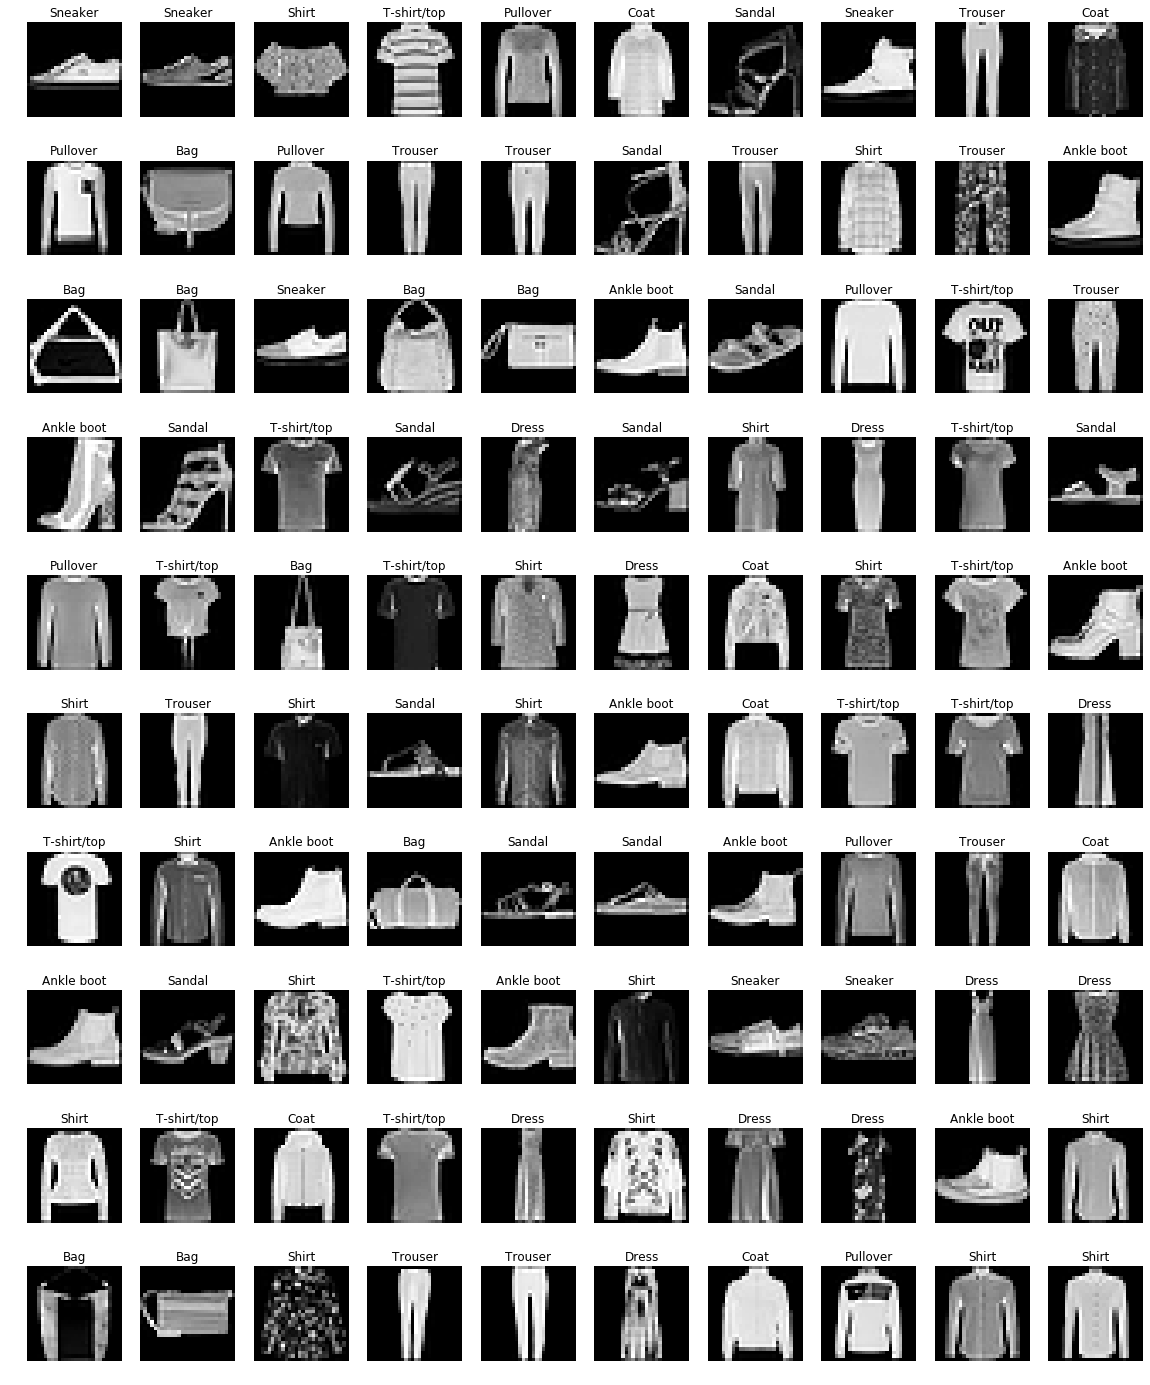

In [112]:
plt.subplots_adjust(wspace=1.5, hspace=2.5)
fig = plt.figure(figsize=(20,25))

img_batch, label_batch = next(iter(train_loader))
img_batch = img_batch.squeeze(dim=1).numpy()
label_batch = label_batch.numpy()
for img_id in range(100):
    ax = plt.subplot(10, 10, img_id+1)
    img = img_batch[img_id]
    
    class_id = label_batch[img_id]
    class_name = train_dataset.classes[class_id]
    ax.imshow(img , cmap='gray')
    ax.set_title(class_name)
    ax.axes.set_axis_off()

### Testing data

In [10]:
from image_processing_workshop.visual import plot_image

In [7]:
test_dataset = datasets.FashionMNIST('fm_data/', download=True, train=False, transform=transformations)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [8]:
len(test_dataset)

10000

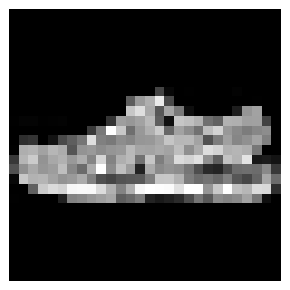

In [12]:
plot_image(test_dataset[21][0])

In [9]:
labels = test_dataset.targets
class_names = list(map(lambda class_id: test_dataset.classes[class_id], labels))
df = pd.DataFrame({'class_names':class_names, 'class_ids': labels})
df.head(10)

,class_names,class_ids
0,Ankle boot,9
1,Pullover,2
2,Trouser,1
3,Trouser,1
4,Shirt,6
5,Trouser,1
6,Coat,4
7,Shirt,6
8,Sandal,5
9,Sneaker,7


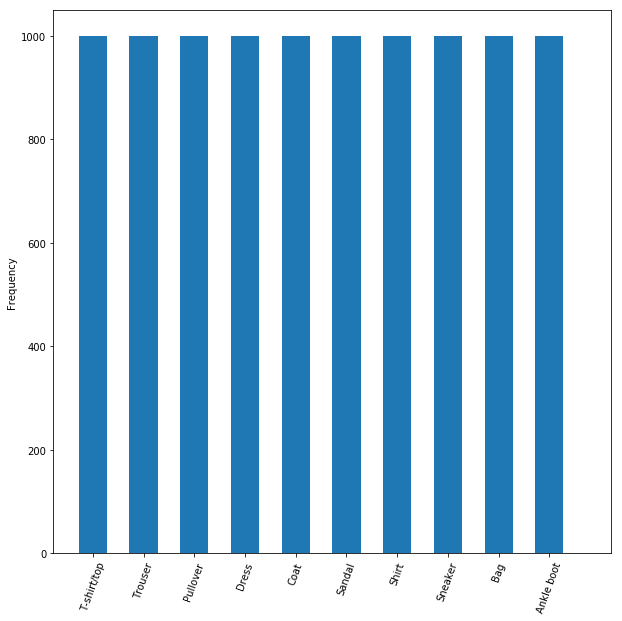

In [136]:
fig = plt.figure(figsize=(10, 10))
data_frame.loc[:,'class_ids'].plot(kind='hist', width=0.5)
ax = plt.gca()
ax_ticks = ax.xaxis.set_ticks(np.arange(0.25, 9, 0.9))
ax_labels = ax.xaxis.set_ticklabels(list(test_dataset.classes), rotation=70)